
<font color = lightblue> Curso ***IDASE*** - ___Inteligência de Dados Aplicada ao Setor Elétrico___

Disciplina ___Inteligência Artificial___

Doscente: _Dr. Augusto Santiago Cerqueira_

Discente: _Giovani Santiago Junqueira_

# <font color = green>***Análise de Dados e Projeto de um Classificador***</font>

***Objetivo Principal:*** Desenvolver classificadores baseados em distância e o k-NN para o conjunto de dados “Dry Bean” da UCI. https://archive.ics.uci.edu/dataset/602/dry+bean+dataset

Inicialmente deve-se analisar os dados, realizar o pré-processamento, para posteriormente
projetar e analisar os classificadores.

## <font color = lightgreen>Importação das bibliotecas necessárias

### <font color = lightyellow>Importando as bibliotecas necessárias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import mutual_info_classif
from scipy.spatial import distance
from imblearn.over_sampling import SMOTE

### <font color = lightyellow>Parametrizando os dados de entrada

In [2]:
data_id = 602 # Repositório UCI - Dry Bean
test_size = 0.3 # Conjunto de teste = 30%
random_state = 42 # Semente para o gerador de números randômicos, garantindo a reprodutibilidade
n = 5 # Quantidades de parâmetros a ser utilizado
k = 10 # Número de visinhos mais próximos

### <font color = lightyellow> Carrega um conjunto de dados a partir do repositório UCI.</font>

Esta função recupera o conjunto de dados associados ao `data_id` fornecido e utiliza
a função `fetch_ucirepo` para extrair os `feaures`, os `targets`, as informações dos
metadados e as variáveis do conjunto de dado do repositório UCI, e então separa as
variáveis de entrada (`x`) da variável de saída (`y`). Ambas as variáveis são retornadas
como DataFrames do Pandas.

In [3]:
repository_dataset = fetch_ucirepo(id=data_id)
x = repository_dataset.data.features
y = repository_dataset.data.targets
metadata = repository_dataset.metadata # metadata
variables = repository_dataset.variables #variable information

In [4]:
print(metadata)

{'uci_id': 602, 'name': 'Dry Bean', 'repository_url': 'https://archive.ics.uci.edu/dataset/602/dry+bean+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/602/data.csv', 'abstract': 'Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 13611, 'num_features': 16, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Thu Mar 28 2024', 'dataset_doi': '10.24432/C50S4B', 'creators': [], 'intro_paper': {'title': 'Multiclass classification of dry beans using computer vision and machine learning techniques', 'authors': 'M. Koklu, Ilker Ali Özkan', 'published_in': 'Computers and Electronic

In [5]:
print(variables)

               name     role         type demographic  \
0              Area  Feature      Integer        None   
1         Perimeter  Feature   Continuous        None   
2   MajorAxisLength  Feature   Continuous        None   
3   MinorAxisLength  Feature   Continuous        None   
4       AspectRatio  Feature   Continuous        None   
5      Eccentricity  Feature   Continuous        None   
6        ConvexArea  Feature      Integer        None   
7     EquivDiameter  Feature   Continuous        None   
8            Extent  Feature   Continuous        None   
9          Solidity  Feature   Continuous        None   
10        Roundness  Feature   Continuous        None   
11      Compactness  Feature   Continuous        None   
12     ShapeFactor1  Feature   Continuous        None   
13     ShapeFactor2  Feature   Continuous        None   
14     ShapeFactor3  Feature   Continuous        None   
15     ShapeFactor4  Feature   Continuous        None   
16            Class   Target  C

## <font color = lightgreen>Pré-processamento

### <font color = lightyellow>Função para plotagem do mapa de calor

In [6]:
def heat_map(matrix, matrix_name):
    plt.figure(figsize=(12,8))
    sns.heatmap(matrix, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title(f"{matrix_name}")
    plt.show()

### <font color = lightyellow>Função para Visualização da Matriz de Confusão

In [7]:
def disp_matriz(conf_matrix, class_name):
    fig, ax = plt.subplots(figsize=(12,8))
    plt.title("Matriz Confusão")
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_name)
    disp.plot(ax=ax, cmap=plt.cm.Oranges)
    ax.set_xlabel('Classe Prevista', fontsize=14)
    ax.set_ylabel('Classe Real', fontsize=14)
    plt.show()

### <font color = lightyellow>***A*** - Dividindo os dados em treino e teste

`método do holdout`

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size,
                                                        random_state=random_state, stratify=y)

### <font color = lightyellow>***B*** - Normaização nos dados de treino e aplicando-a nos dados de teste

In [9]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### <font color = lightyellow>***C*** - Utilizando o `SMOTE` para balanceamento das classes

In [10]:
x_train_bal, y_train_bal = SMOTE(random_state=random_state).fit_resample(x_train, y_train)

### <font color = lightyellow>***D*** - Codifinado as labels, transformando as classes em valores numéricos.

In [11]:
label_encoder = LabelEncoder()
y_train_bal = label_encoder.fit_transform(y_train_bal.values.ravel())
y_test = label_encoder.transform(y_test.values.ravel())

In [12]:
classes = label_encoder.inverse_transform(np.unique(y_train_bal))

### <font color = lightyellow>***E*** - Matriz de correlação de entrada e saída

In [13]:
correlation_matrix = pd.DataFrame(x_train_bal).corr()

In [14]:
correlations = pd.Series(np.corrcoef(x_train_bal.T, y_train_bal)[-1, :-1])
top_n_corr_features = correlations.abs().sort_values(ascending=False).head(n).index
x_train_corr = x_train_bal[:, top_n_corr_features]
x_test_corr = x_test[:, top_n_corr_features]

In [15]:
top_n_corr_features

Index([1, 7, 12, 3, 2], dtype='int64')

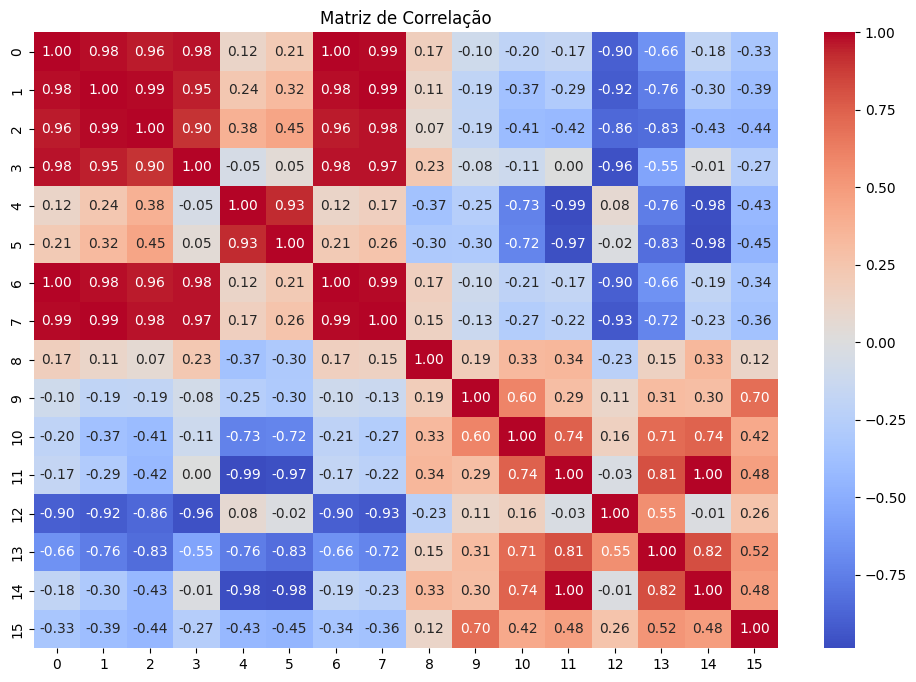

In [16]:
heat_map(correlation_matrix, "Matriz de Correlação")

### <font color = lightyellow>***F*** - Cálculo a informação mútua entre os parâmetros de entrada e a saída

In [17]:
mutual_info = mutual_info_classif(x_train_bal, y_train_bal)

In [18]:
top_n_mutual_info_features = np.argsort(mutual_info)[-n:]
x_train_mutual_info = x_train_bal[:, top_n_mutual_info_features]
x_test_mutual_info = x_test[:, top_n_mutual_info_features]

In [19]:
top_n_mutual_info_features

array([2, 7, 6, 0, 1])

### <font color = lightyellow>***G*** - Cálculo a razão discriminante de Fisher

In [20]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train_bal, y_train_bal)
fisher_ratios = np.sum(np.abs(lda.coef_), axis=0)

In [21]:
top_n_fisher_features = np.argsort(fisher_ratios)[-n:]
x_train_fisher = x_train_bal[:, top_n_fisher_features]
x_test_fisher = x_test[:, top_n_fisher_features]

In [22]:
top_n_fisher_features

array([ 2,  0,  7, 14, 11])

### <font color = lightyellow>***H*** - Análise de Componentes Principais (PCA)

In [23]:
pca = PCA(n_components=n)
pca.fit(x_train_bal)
x_train_pca = pca.transform(x_train_bal)
x_test_pca = pca.transform(x_test)

In [24]:
top_n_pca_features = pca.components_

In [25]:
top_n_pca_features

array([[ 3.94508342e-01,  3.54869692e-01,  3.42278618e-01,
         3.59497460e-01,  7.28466049e-02,  9.62164279e-02,
         3.94259379e-01,  3.67030446e-01,  2.66351166e-02,
        -5.63033892e-02, -9.68850193e-02, -8.69673610e-02,
        -2.81274730e-01, -2.12847407e-01, -9.02642854e-02,
        -1.18003791e-01],
       [ 1.23451119e-01,  2.97985262e-02, -4.50370962e-02,
         2.15657040e-01, -3.89468304e-01, -3.75849238e-01,
         1.21243145e-01,  7.95536293e-02,  2.11571726e-01,
         1.89176668e-01,  3.18420027e-01,  3.91379269e-01,
        -1.73158820e-01,  2.51908621e-01,  3.89777542e-01,
         2.02165191e-01],
       [ 5.17404348e-02, -6.78454029e-04,  7.17649044e-02,
        -3.45974648e-02,  1.88544723e-01,  1.71059382e-01,
         4.22675260e-02,  2.96066084e-02,  3.25672107e-02,
         7.38201718e-01,  1.51819984e-01, -1.63801531e-01,
         8.19071855e-02, -1.05156531e-01, -1.62111055e-01,
         5.32515197e-01],
       [-2.99652945e-02, -4.12394370e

## <font color = lightgreen>Projeto dos Classificadores

In [26]:
projetos = pd.DataFrame(columns=['accuracy', 'sensitivity', 'caracteristic'], 
                        index=['mahalanobis','mahalanobis_corr', 'mahalanobis_mutual',
                               'mahalanobis_fisher', 'mahalanobis_pca', 'knn','knn_corr',
                               'knn_mutual','knn_fisher', 'knn_pca', 'lda','lda_corr',
                               'lda_mutual','lda_fisher', 'lda_pca'])

### <font color = yellow> Classificadores baseado na Distância de Mahalanobis

#### <font color = lightyellow> ***00*** - Função para calcular a matriz de covariância e a distância de Mahalanobis

In [27]:
def mahalanobis_classifier(x_train_bal, x_test, y_train_bal, y_test):
    """ Implementa um classificador baseado na distância de Mahalanobis utilizando os dados de treino balanceados,
    realiza previsões nos dados de teste e avalia o desempenho do modelo.  

    Args:
        x_train (array-like): Dados de treino usados para treinar o modelo.
        x_test (array-like): Dados de teste usados para avaliar o modelo.
        y_train (array-like): Rótulos das classes correspondentes aos dados de treino balanceados.
        y_test (array-like): Rótulos das classes correspondentes aos dados de teste.

    Return:
        metrics (list): Uma lista contendo as seguintes métricas de desempenho:
            - accuracy (float): A precisão do modelo, calculada como a proporção de previsões corretas.
            - sensitivity (float): A sensibilidade do modelo, calculada como a média das taxas de verdadeiros positivos por classe.
            - specificity (float): A especificidade do modelo, calculada como a média das taxas de verdadeiros negativos por classe.
        conf_matrix (array-like): A matriz de confusão, que mostra o desempenho do modelo em termos de 
        verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos.
        
    Notas:
        A função calcula a distância de Mahalanobis entre cada amostra de teste e a média 
        de cada classe no conjunto de treino, utilizando a matriz de covariância do conjunto 
        e treino. A classe com a menor distância é atribuída à amostra.
    """
    cov_matrix = np.cov(x_train_bal, rowvar=False)
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    y_pred = []
    classes = np.unique(y_train_bal)
    for x in x_test:
        distances = []
        for c in classes:
            mean = np.mean(x_train_bal[y_train_bal == c], axis=0)
            distances.append(distance.mahalanobis(x, mean, inv_cov_matrix))
        y_pred.append(np.argmin(distances))
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    sensitivity = (np.diag(conf_matrix) / conf_matrix.sum(axis=1)).mean()
    caracteristic =  (np.diag(conf_matrix) / conf_matrix.sum(axis=0)).mean()
    return [accuracy, sensitivity, caracteristic], conf_matrix

#### <font color = lightyellow> ***01*** - Utilizando todos os parâmetros de entrada

Acurácia com todos os Parâmetros: 86.851%


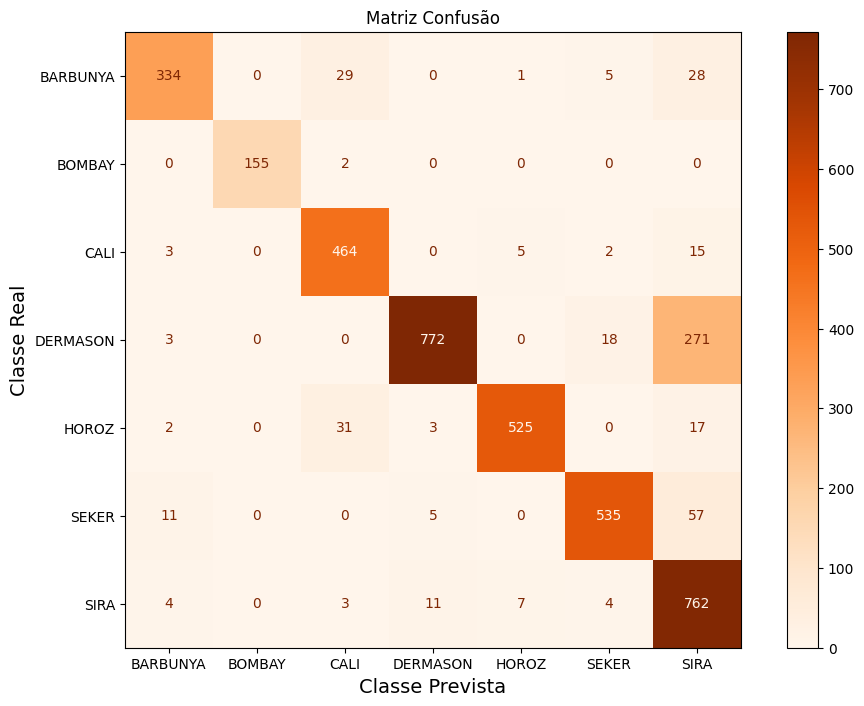

In [28]:
# avaliando o classificador com todos os parâmetros
projetos.loc['mahalanobis'], conf_matrix_all = mahalanobis_classifier(x_train_bal, x_test, y_train_bal, y_test)

disp_matriz(conf_matrix_all, classes)

#### <font color = lightyellow> ***02*** - Utilizando os n parâmentros de maior correlação

Acurácia com 5 Parâmetros (Correlação): 84.819%


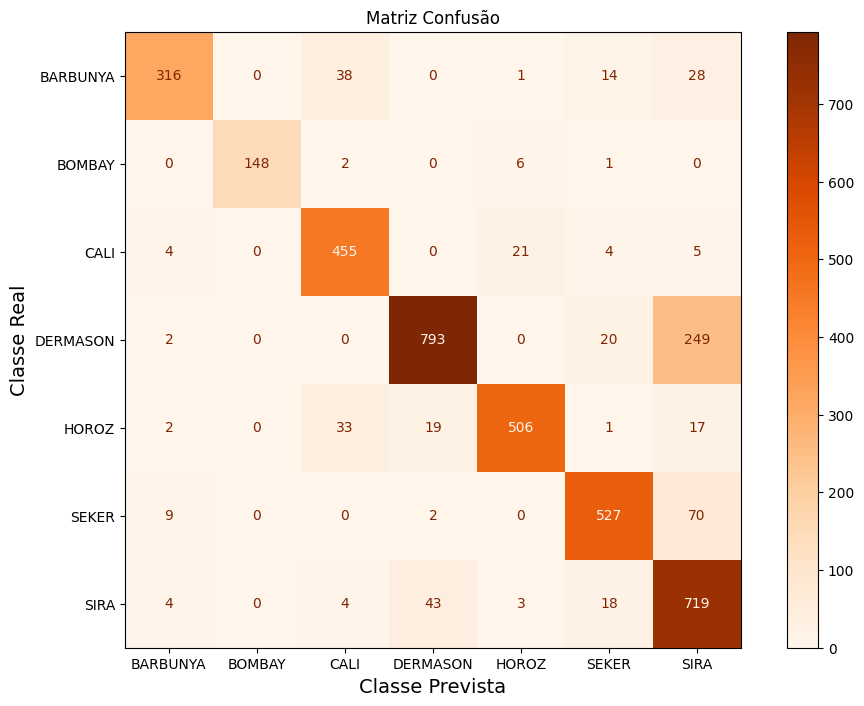

In [30]:
# Distância de Mahalanobis com n parâmetros de maior correlação
projetos.loc['mahalanobis_corr'], conf_matrix_corr = mahalanobis_classifier(x_train_corr, x_test_corr, y_train_bal, y_test)

disp_matriz(conf_matrix_corr, classes)

#### <font color = lightyellow> ***03*** - Utilizando os n parâmentros de maior informação mútua

Acurácia com 5 Parâmetros (Informação Mútua): 87.169%


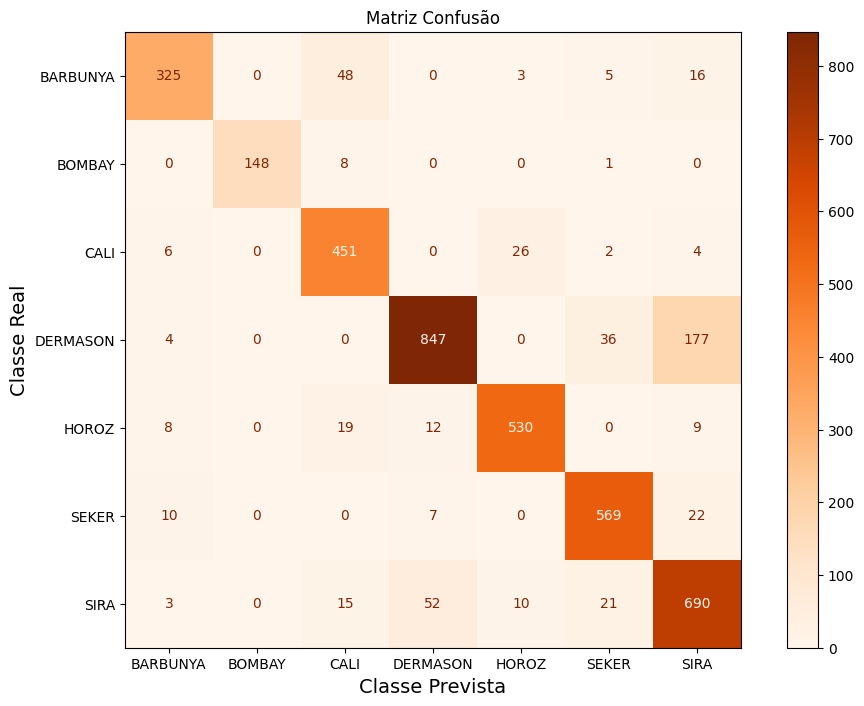

In [32]:
# Distância de Mahalanobis com n parâmetros de maior informação mútua
projetos.loc['mahalanobis_mutual'], conf_matrix_mutual_info = mahalanobis_classifier(x_train_mutual_info, x_test_mutual_info, y_train_bal, y_test)

disp_matriz(conf_matrix_mutual_info, classes)

#### <font color = lightyellow> ***04*** - Utilizando os n parâmentros de maior discriminante de Fisher

Acurácia com 5 Parâmetros (Razão Discriminante de Fisher): 85.627%


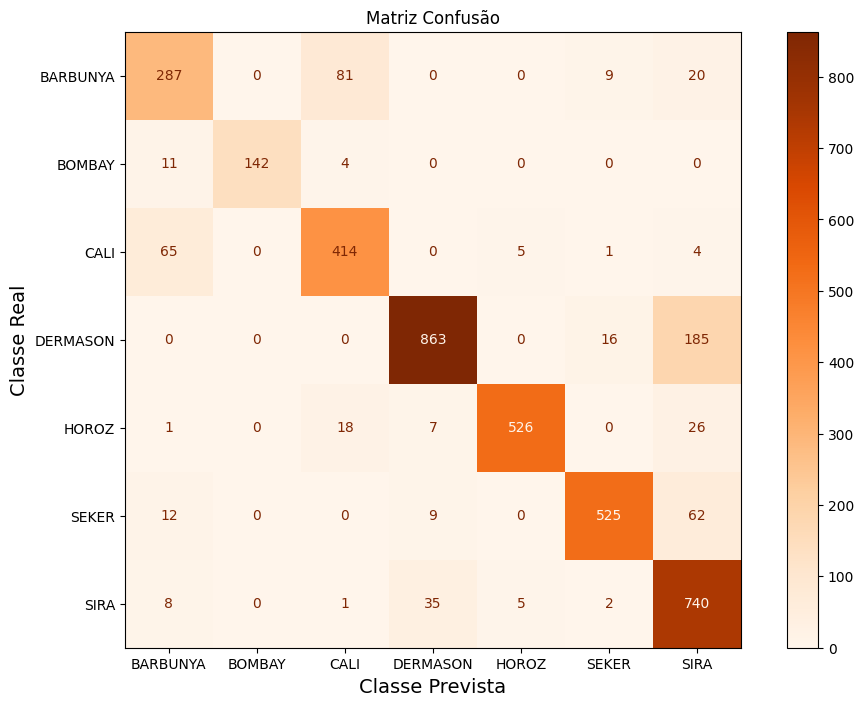

In [34]:
# Distância de Mahalanobis com n parâmetros de maior razão discriminante de Fisher
projetos.loc['mahalanobis_fisher'], conf_matrix_fisher = mahalanobis_classifier(x_train_fisher, x_test_fisher, y_train_bal, y_test)

disp_matriz(conf_matrix_fisher, classes)

#### <font color = lightyellow> ***05*** - Utilizando os n parâmentros do PCA

Acurácia com 5 Parâmetros (PCA): 78.526%


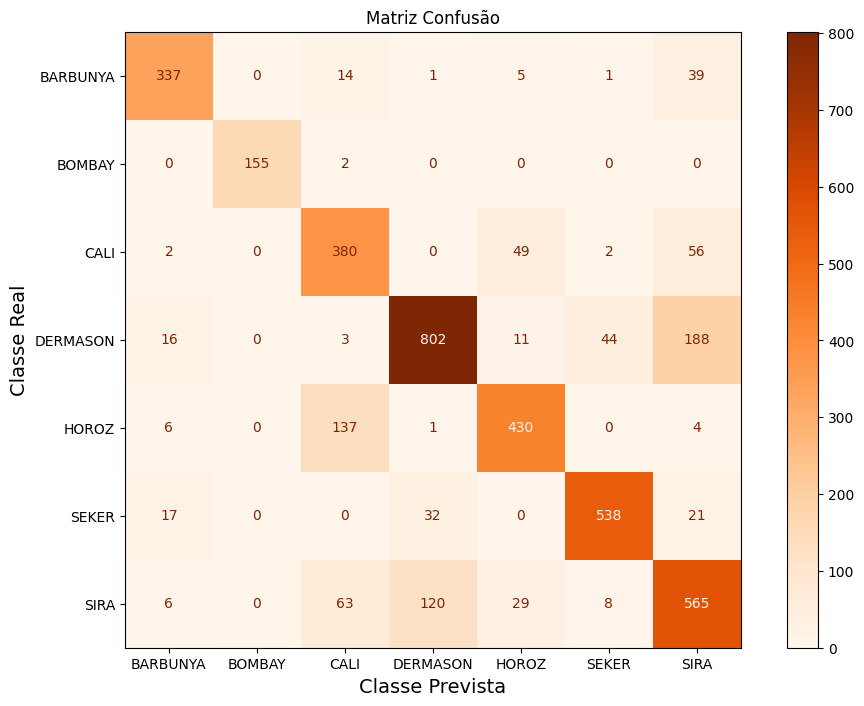

In [36]:
# Distância de Mahalanobis com n parâmetros da PCA
projetos.loc['mahalanobis_pca'], conf_matrix_pca  = mahalanobis_classifier(x_train_pca, x_test_pca, y_train_bal, y_test)

disp_matriz(conf_matrix_pca, classes)

### <font color = yellow> Classificadores baseado no k-NN

#### <font color = lightyellow> ***00*** - Função para rodar o k-NN com diferentes conjuntos de features

In [38]:
def knn_classifier(x_train_bal, x_test, y_train_bal, y_test, k):
    """ Treina um classificador k-Nearest Neighbors (k-NN) usando os dados de treino balanceados,
    realiza previsões nos dados de teste e avalia o desempenho do modelo.  

    Args:
        x_train (array-like): Dados de treino usados para treinar o modelo.
        x_test (array-like): Dados de teste usados para avaliar o modelo.
        y_train (array-like): Rótulos das classes correspondentes aos dados de treino balanceados.
        y_test (array-like): Rótulos das classes correspondentes aos dados de teste.
        k (int): Número de vizinhos mais próximos a serem considerados pelo classificador k-NN.

    Return:
        metrics (list): Uma lista contendo as seguintes métricas de desempenho:
            - accuracy (float): A precisão do modelo, calculada como a proporção de previsões corretas.
            - sensitivity (float): A sensibilidade do modelo, calculada como a média das taxas de verdadeiros positivos por classe.
            - specificity (float): A especificidade do modelo, calculada como a média das taxas de verdadeiros negativos por classe.
        conf_matrix (array-like): A matriz de confusão, que mostra o desempenho do modelo em termos de 
        verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos.
    """
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_bal, y_train_bal)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    sensitivity = (np.diag(conf_matrix) / conf_matrix.sum(axis=1)).mean()
    caracteristic =  (np.diag(conf_matrix) / conf_matrix.sum(axis=0)).mean()
    return [accuracy, sensitivity, caracteristic], conf_matrix

#### <font color = lightyellow> ***01*** - Utilizando todos os parâmetros de entrada

Acurácia k-NN com todos os Parâmetros: 91.797%


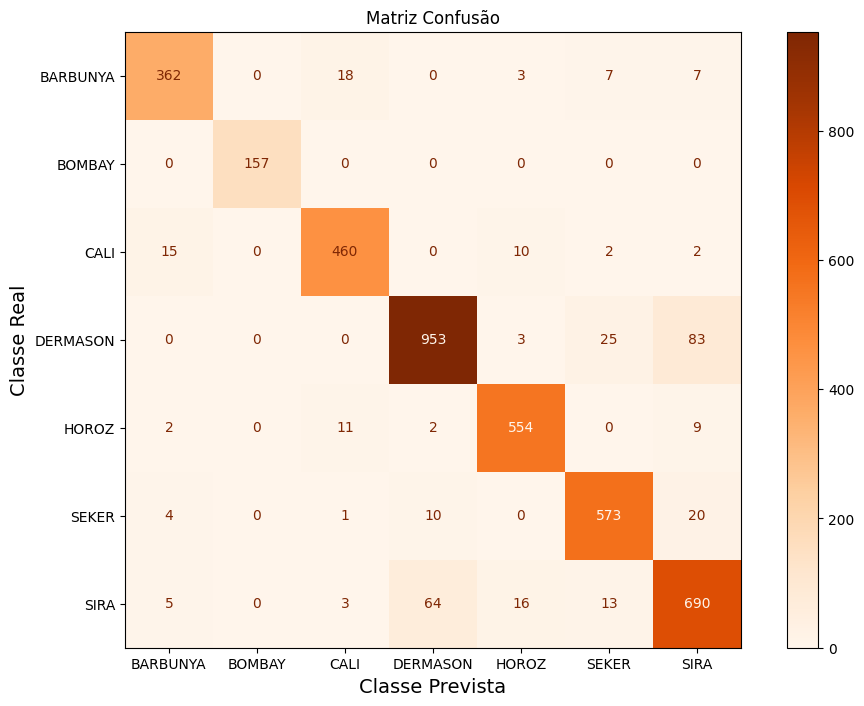

In [39]:
# avaliando o classificador com todos os parâmetros
projetos.loc['knn'], conf_matrix_knn = knn_classifier(x_train_bal, x_test, y_train_bal, y_test, k)

disp_matriz(conf_matrix_knn, classes)

#### <font color = lightyellow> ***02*** - Utilizando os n parâmentros de maior correlação

Acurácia com 5 Parâmetros (Correlação): 90.524%


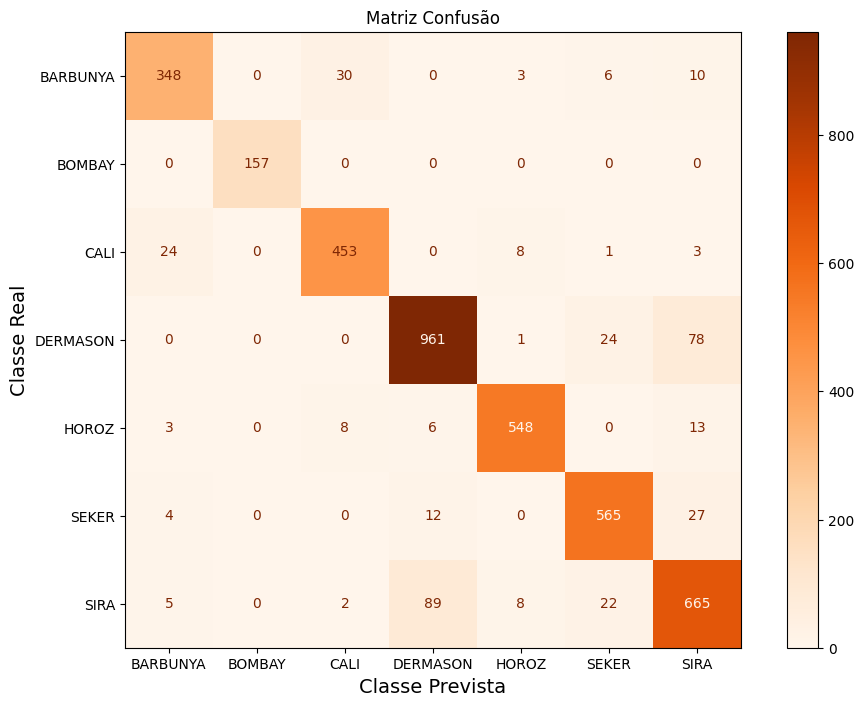

In [41]:
# k-NN com n parâmetros de maior correlação
projetos.loc['knn_corr'], conf_matrix_knn_corr = knn_classifier(x_train_corr, x_test_corr, y_train_bal, y_test, k)

disp_matriz(conf_matrix_knn_corr, classes)

#### <font color = lightyellow> ***03*** - Utilizando os n parâmentros de maior informação mútua

Acurácia com 5 Parâmetros (Informação Mútua): 90.353%


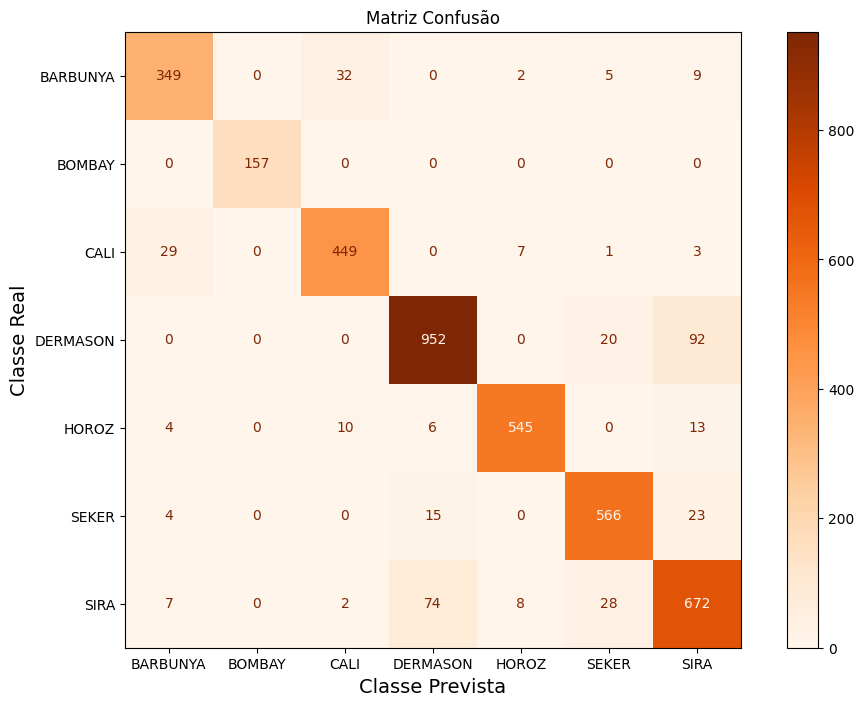

In [43]:
# k-NN com n parâmetros de maior informação mútua
projetos.loc['knn_mutual'], conf_matrix_knn_mutual_info = knn_classifier(x_train_mutual_info, x_test_mutual_info, y_train_bal, y_test, k)

disp_matriz(conf_matrix_knn_mutual_info, classes)

#### <font color = lightyellow> ***04*** - Utilizando os n parâmentros de maior discriminante de Fisher

Acurácia com 5 Parâmetros (Razão Discriminante de Fisher): 86.631%


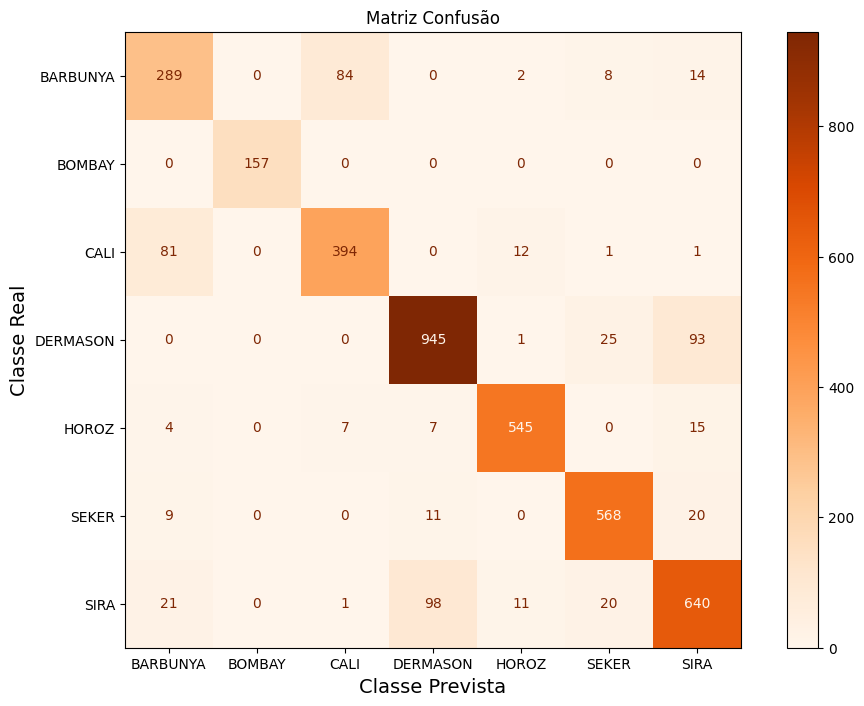

In [45]:
# k-NN com n parâmetros de maior razão discriminante de Fisher
projetos.loc['knn_fisher'], conf_matrix_knn_fisher = knn_classifier(x_train_fisher, x_test_fisher, y_train_bal, y_test, k)

disp_matriz(conf_matrix_knn_fisher, classes)

#### <font color = lightyellow> ***05*** - Utilizando os n parâmentros do PCA

Acurácia com 5 Parâmetros (PCA): 91.650%


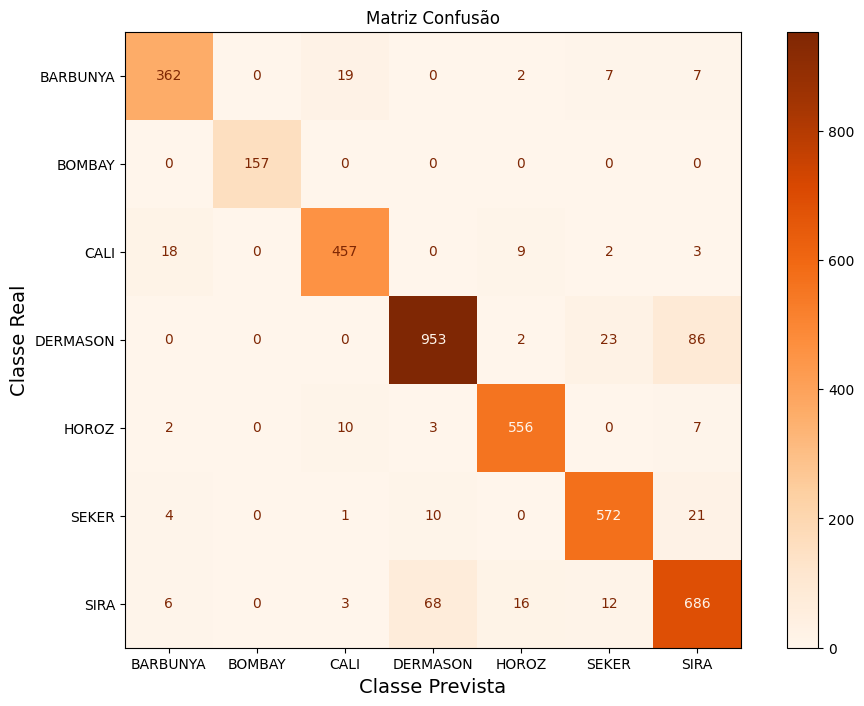

In [47]:
# k-NN com n parâmetros da PCA
projetos.loc['knn_pca'], conf_matrix_knn_pca = knn_classifier(x_train_pca, x_test_pca, y_train_bal, y_test, k)

disp_matriz(conf_matrix_knn_pca, classes)

### <font color = yellow> Classificadores Linear

#### <font color = lightyellow> ***00*** -  Função para rodar o LDA com diferentes conjuntos de features

In [49]:
def lda_classifier(x_train, x_test, y_train, y_test):
    """ Treina um classificador Linear Discriminant Analysis (LDA) usando os dados de treino balanceados,
    realiza previsões nos dados de teste e avalia o desempenho do modelo.

    Args:
        x_train (array-like): Dados de treino usados para treinar o modelo.
        x_test (array-like): Dados de teste usados para avaliar o modelo.
        y_train (array-like): Rótulos das classes correspondentes aos dados de treino balanceados.
        y_test (array-like): Rótulos das classes correspondentes aos dados de teste.

    Return:
        metrics (list): Uma lista contendo as seguintes métricas de desempenho:
            - accuracy (float): A precisão do modelo, calculada como a proporção de previsões corretas.
            - sensitivity (float): A sensibilidade do modelo, calculada como a média das taxas de verdadeiros positivos por classe.
            - specificity (float): A especificidade do modelo, calculada como a média das taxas de verdadeiros negativos por classe.
        conf_matrix (array-like): A matriz de confusão, que mostra o desempenho do modelo em termos de 
        verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos.
    """
        accuracy (float): A precisão do modelo, calculada como a proporção de previsões corretas.
        conf_matrix (array-like): A matriz de confusão, que mostra o desempenho do modelo em termos de 
        verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos.
    """
    lda = LinearDiscriminantAnalysis()
    lda.fit(x_train, y_train)
    y_pred = lda.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    sensitivity = (np.diag(conf_matrix) / conf_matrix.sum(axis=1)).mean()
    caracteristic =  (np.diag(conf_matrix) / conf_matrix.sum(axis=0)).mean()
    return [accuracy, sensitivity, caracteristic], conf_matrix

#### <font color = lightyellow> ***01*** - Utilizando todos os parâmetros de entrada

Acurácia LDA com todos os Parâmetros: 89.887%


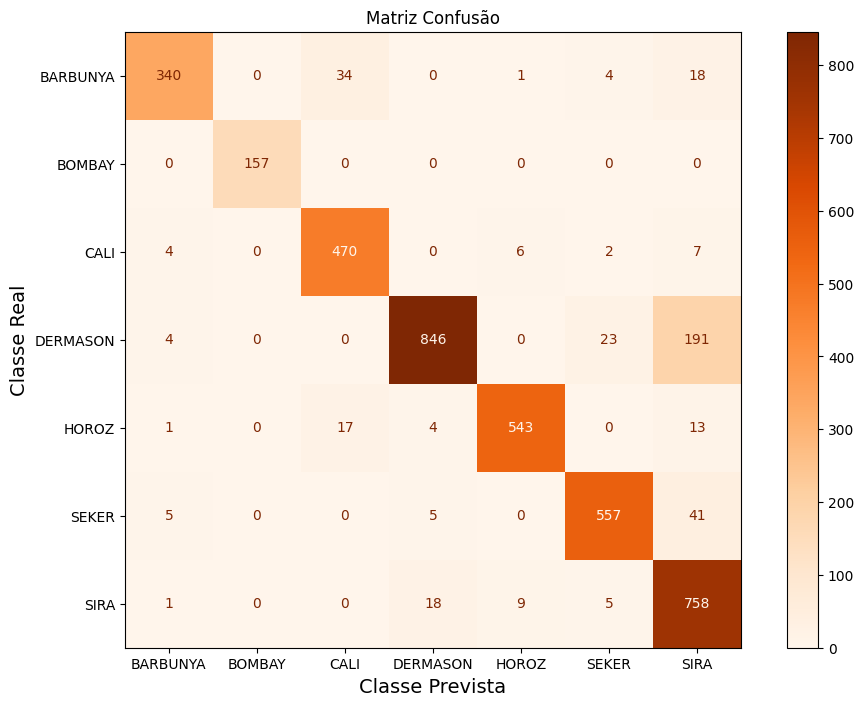

In [50]:
# avaliando o classificador com todos os parâmetros
projetos.loc['lda'], conf_matrix_lda = lda_classifier(x_train_bal, x_test, y_train_bal, y_test)

disp_matriz(conf_matrix_lda, classes)

#### <font color = lightyellow> ***02*** - Utilizando os n parâmentros de maior correlação

Acurácia LDA com 5 Parâmetros (Correlação): 87.953%


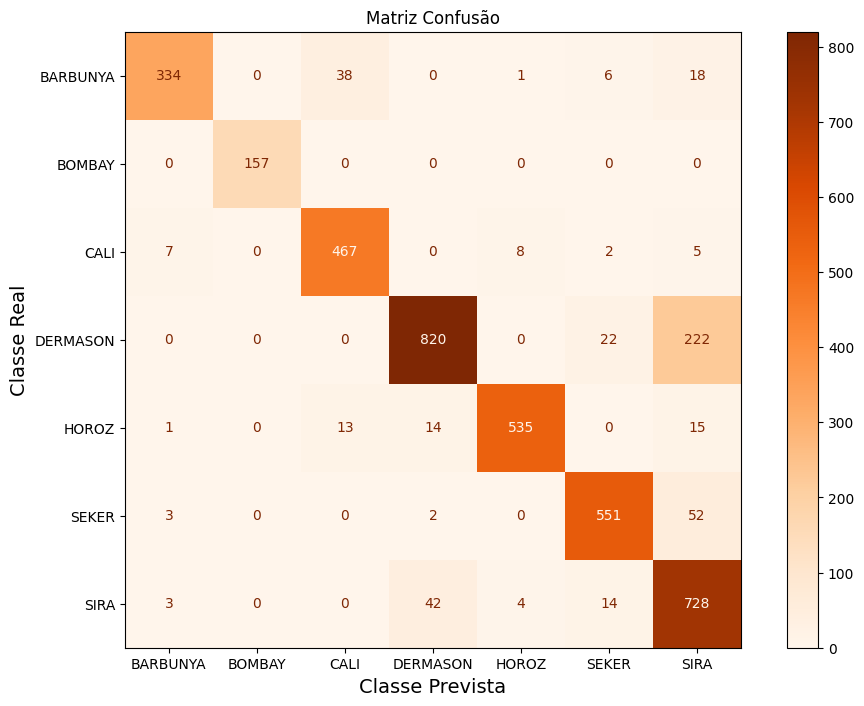

In [52]:
# LDA com n parâmetros de maior correlação
projetos.loc['lda_corr'], conf_matrix_lda_corr = lda_classifier(x_train_corr, x_test_corr, y_train_bal, y_test)

disp_matriz(conf_matrix_lda_corr, classes)

#### <font color = lightyellow> ***03*** - Utilizando os n parâmentros de maior informação mútua

Acurácia LDA com 5 Parâmetros (Informação Mútua): 89.471%


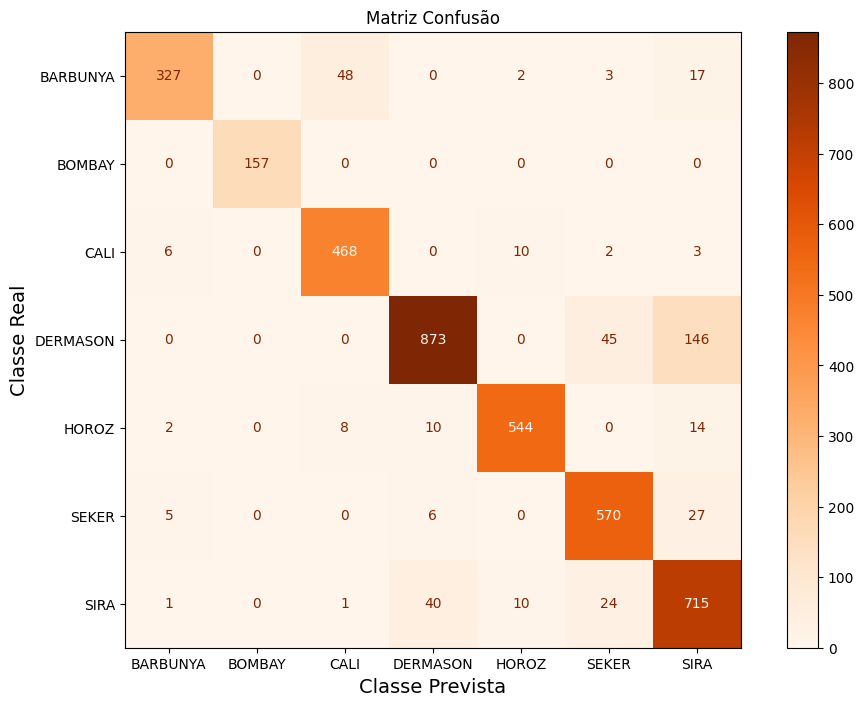

In [54]:
# LDA com n parâmetros de maior informação mútua
projetos.loc['lda_mutual'], conf_matrix_lda_mutual_info = lda_classifier(x_train_mutual_info, x_test_mutual_info, y_train_bal, y_test)

disp_matriz(conf_matrix_lda_mutual_info, classes)

#### <font color = lightyellow> ***04*** - Utilizando os n parâmentros de maior discriminante de Fisher

Acurácia LDA com 5 Parâmetros (Razão Discriminante de Fisher): 87.120%


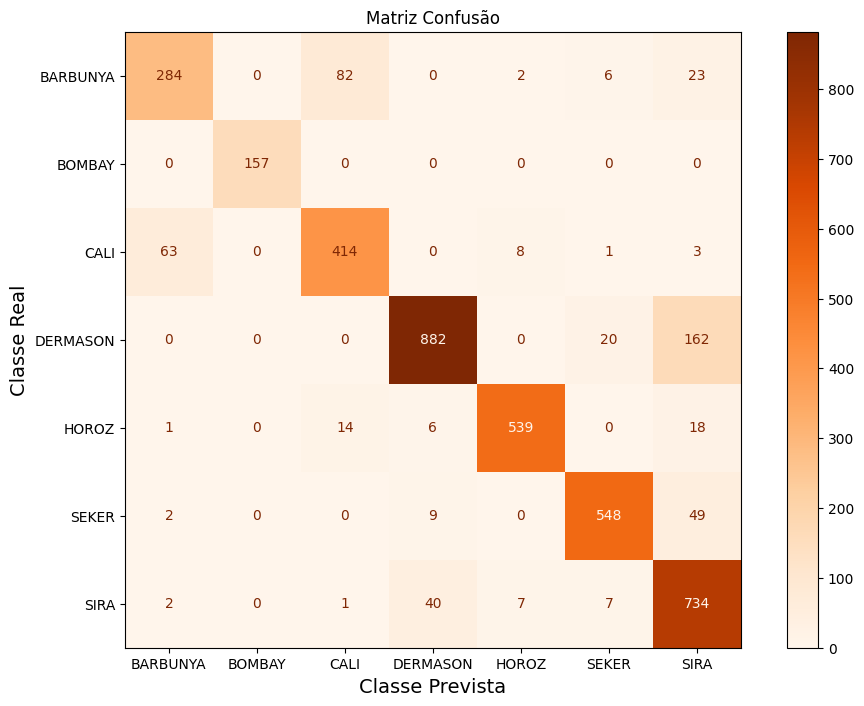

In [56]:
# LDA com n parâmetros de maior razão discriminante de Fisher
projetos.loc['lda_fisher'], conf_matrix_lda_fisher = lda_classifier(x_train_fisher, x_test_fisher, y_train_bal, y_test)

disp_matriz(conf_matrix_lda_fisher, classes)

#### <font color = lightyellow> ***05*** - Utilizando os n parâmentros do PCA

Acurácia LDA com 5 Parâmetros (PCA): 90.083%


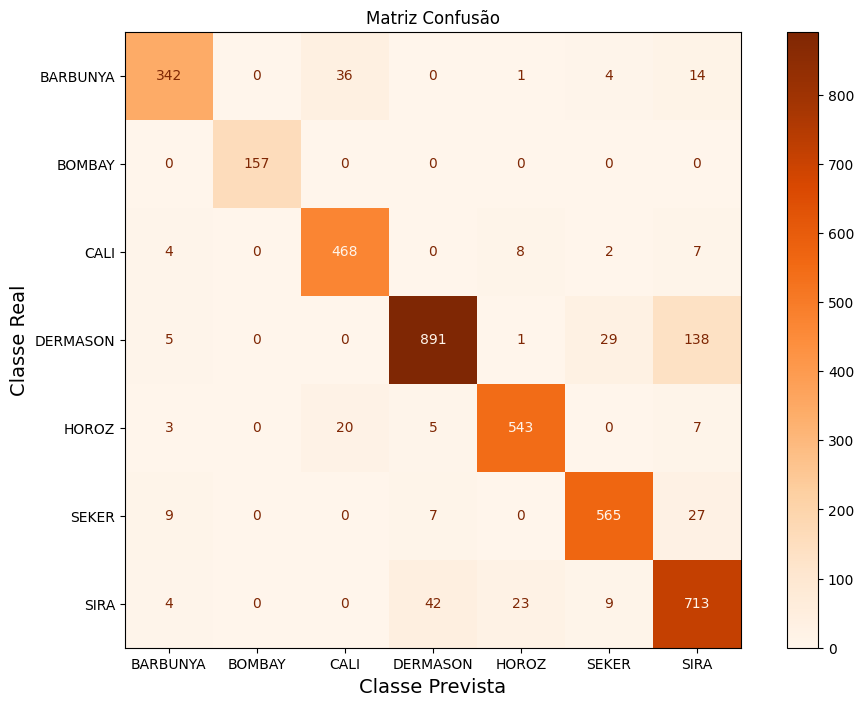

In [58]:
# LDA com n parâmetros da PCA
projetos.loc['lda_pca'], conf_matrix_lda_pca = lda_classifier(x_train_pca, x_test_pca, y_train_bal, y_test)

disp_matriz(conf_matrix_lda_pca, classes)

## <font color = lightgreen>Conclusão

In [60]:
projetos

,accuracy,sensitivity,caracteristic
mahalanobis,0.868511,0.893512,0.910815
mahalanobis_corr,0.848188,0.866514,0.888892
mahalanobis_mutual,0.871694,0.886397,0.892827
mahalanobis_fisher,0.856268,0.856306,0.879055
mahalanobis_pca,0.78526,0.815726,0.817995
knn,0.917973,0.931634,0.930369
knn_corr,0.90524,0.917747,0.919912
knn_mutual,0.903526,0.916488,0.916899
knn_fisher,0.866308,0.87258,0.871676
knn_pca,0.916503,0.930294,0.9291


In [61]:
print(f"Com base na \033[1;31macurâcia\033[0m o melhor projeto de classificador é o \033[1;33m{projetos['accuracy'].idxmax()}\033[0m com valor de: \033[1;33m{projetos['accuracy'].max():.3%}\033[0m")
print(f"Com base na \033[1;31msensibilidade\033[0m o melhor projeto de classificador é o \033[1;33m{projetos['sensitivity'].idxmax()}\033[0m com valor de: \033[1;33m{projetos['sensitivity'].max():.3%}\033[0m")
print(f"Com base na \033[1;31mespecificidades\033[0m o melhor projeto de classificador é o \033[1;33m{projetos['caracteristic'].idxmax()}\033[0m com valor de: \033[1;33m{projetos['caracteristic'].max():.3%}\033[0m")

Com base na acurâcia o melhor projeto de classificador é o knn com valor de: 91.797%
Com base na sensibilidade o melhor projeto de classificador é o knn com valor de: 93.163%
Com base na especificidades o melhor projeto de classificador é o knn com valor de: 93.037%
